Sahad Rafiuzzaman <br>
CYSE 635: AI Security and Privacy <br>
Dr. MD Morshed Alam <br>
November 6, 2024 <br>

#Assignment 2: Data Poisoning Attack on AI <br>

Given the aforementioned datasets, perform the following tasks:

* Review the following materials on data poisoning attack

* Perform data poisoning attack on the following supervised learning ML classifiers:
  *   Logistic Regression
  *   Support Vector Machine

* Comparatively discuss how does the data poisoning attack impact the accuracy of both AI models?
  * Use confusion matrix to show your results.

##Setting up


###Import necessary libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

### Upload CSV files into Google Colab

In [87]:
from google.colab import files
uploaded = files.upload()

Saving benign-log_radio_status_3.csv to benign-log_radio_status_3 (3).csv
Saving jamming-log_radio_status_3.csv to jamming-log_radio_status_3 (3).csv
Saving spoofing-hackrf-log_radio_status_3.csv to spoofing-hackrf-log_radio_status_3 (3).csv


#### Check the current working directory and file using `os.getcwd()`

In [88]:
import os
curr_dir = os.getcwd()
print(curr_dir)
print(os.listdir(curr_dir))

/content
['.config', 'benign-log_radio_status_3 (1).csv', 'jamming-log_radio_status_3 (1).csv', 'jamming-log_radio_status_3.csv', 'spoofing-hackrf-log_radio_status_3 (3).csv', 'spoofing-hackrf-log_radio_status_3 (1).csv', 'spoofing-hackrf-log_radio_status_3 (2).csv', 'benign-log_radio_status_3 (2).csv', 'benign-log_radio_status_3.csv', 'benign-log_radio_status_3 (3).csv', 'jamming-log_radio_status_3 (2).csv', 'jamming-log_radio_status_3 (3).csv', 'spoofing-hackrf-log_radio_status_3.csv', 'sample_data']


#### Check all the files in the `/content/` directory

In [89]:
ls -al /content/

total 112
drwxr-xr-x 1 root root 4096 Nov  7 00:35  ./
drwxr-xr-x 1 root root 4096 Nov  7 00:19  ../
-rw-r--r-- 1 root root 7604 Nov  7 00:24 'benign-log_radio_status_3 (1).csv'
-rw-r--r-- 1 root root 7604 Nov  7 00:33 'benign-log_radio_status_3 (2).csv'
-rw-r--r-- 1 root root 7604 Nov  7 00:35 'benign-log_radio_status_3 (3).csv'
-rw-r--r-- 1 root root 7604 Nov  7 00:22  benign-log_radio_status_3.csv
drwxr-xr-x 4 root root 4096 Nov  5 14:22  .config/
-rw-r--r-- 1 root root 6857 Nov  7 00:24 'jamming-log_radio_status_3 (1).csv'
-rw-r--r-- 1 root root 6857 Nov  7 00:33 'jamming-log_radio_status_3 (2).csv'
-rw-r--r-- 1 root root 6857 Nov  7 00:35 'jamming-log_radio_status_3 (3).csv'
-rw-r--r-- 1 root root 6857 Nov  7 00:22  jamming-log_radio_status_3.csv
drwxr-xr-x 1 root root 4096 Nov  5 14:22  sample_data/
-rw-r--r-- 1 root root 4247 Nov  7 00:24 'spoofing-hackrf-log_radio_status_3 (1).csv'
-rw-r--r-- 1 root root 4247 Nov  7 00:33 'spoofing-hackrf-log_radio_status_3 (2).csv'
-rw-r--r-- 

#### Read the CSV files


In [ ]:
benign_logs = pd.read_csv('/content/benign_log.csv')
jamming_logs = pd.read_csv('/content/jamming_log.csv')
spoofing_logs = pd.read_csv('/content/spoofing_log.csv')

print(f'\n Benign_logs shape: {benign_logs.shape}')
print(f'\n Jamming_logs shape: {jamming_logs.shape}')
print(f'\n Spoofing_logs shape: {spoofing_logs.shape}')

print(f'\n Top 5 rows of Benign_logs: \n {benign_logs.head(5)}')
print(f'\n Top 5 rows of Jamming_logs columns: \n {jamming_logs.head(5)}')
print(f'\n Top 5 rows of Spoofing_logs columns: \n {spoofing_logs.head(5)}')


 Benign_logs shape: (247, 7)

 Jamming_logs shape: (223, 7)

 Spoofing_logs shape: (138, 7)

 Top 5 rows of Benign_logs: 
    timestamp  rssi  remote_rssi  txbuf  noise  remote_noise  attack
0  614850759   198          198    100     33            40       0
1  615898770   197          197     93     46            48       0
2  616815893   195          195     96     28            38       0
3  617852800   192          197    100     30            39       0
4  618908331   182          176     97     20            41       0

 Top 5 rows of Jamming_logs columns: 
    timestamp  rssi  remote_rssi  txbuf  noise  remote_noise  attack
0  332826769   176          171     97     38            29       1
1  333858763   171          178     97     30            33       1
2  334902756   175          176     97     30            38       1
3  335827765   182          182    100     32            38       1
4  336862004   185          183     96     26            35       1

 Top 5 rows of Spoo

## Perform Preprocessing

#### Concatenate the datasets together


In [91]:
df = pd.concat([benign_logs, jamming_logs, spoofing_logs], ignore_index=True)

print(f'\n Concatenated dataset shape: {df.shape}')
print(f'\n First 5 rows: \n {df.head(5)}')
print(f'\n Last 5 rows: \n {df.tail(5)}')


 Concatenated dataset shape: (608, 7)

 First 5 rows: 
    timestamp  rssi  remote_rssi  txbuf  noise  remote_noise  attack
0  614850759   198          198    100     33            40       0
1  615898770   197          197     93     46            48       0
2  616815893   195          195     96     28            38       0
3  617852800   192          197    100     30            39       0
4  618908331   182          176     97     20            41       0

 Last 5 rows: 
      timestamp  rssi  remote_rssi  txbuf  noise  remote_noise  attack
603  390804770   178          180     97     33            37       1
604  391840769   180          174    100     28            38       1
605  392894761   168          171     96     32            37       1
606  393812813   172          169     96     29            47       1
607  394842769   172          171     97     26            34       1


#### Get the column names


In [92]:
col_name_list = list(df.columns)
print(f'\n Column names: {col_name_list}')
size_col_name_list = len(col_name_list)
print(f'\n Numbers of columns: {size_col_name_list}')


 Column names: ['timestamp', 'rssi', 'remote_rssi', 'txbuf', 'noise', 'remote_noise', 'attack']

 Numbers of columns: 7


#### Preprocessing

In [93]:
labelencoder = LabelEncoder()
df['rssi'] = labelencoder.fit_transform(df['rssi'])
df['remote_rssi'] = labelencoder.fit_transform(df['remote_rssi'])
df['txbuf'] = labelencoder.fit_transform(df['txbuf'])
df['noise'] = labelencoder.fit_transform(df['noise'])
df['remote_noise'] = labelencoder.fit_transform(df['remote_noise'])

df['timestamp'] = df['timestamp'].replace(" ", 0).astype('float64')
df['timestamp'] = df['timestamp'].astype(float)

df['attack'] = df['attack'].replace(" ", 0).astype('float64')
df['attack'] = df['attack'].astype(float)

## Machine Learning Modeling

### Create `train` and `test` datasets

In [94]:
# Preprocessing
X = df.drop(labels = ["attack"],axis = 1)
Y = df["attack"].values

# train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

# Shapes
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (486, 6)
X_test Shape:  (122, 6)
y_train Shape:  (486,)
y_test Shape:  (122,)


### K-nearest Neighbors (k-NN)

In [95]:
knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors=79, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=79)

#### Model Evaluation for KNN

In [96]:
y_pred_knn = knn.predict(X_test)
print(f'\n y_pred_knn: \n {y_pred_knn} \n')
print(f'\n y_test: \n {y_test}')


 y_pred_knn: 
 [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0.] 


 y_test: 
 [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0.]


#### Confusion Matrix for KNN

In [97]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[55  0]
 [ 0 67]]


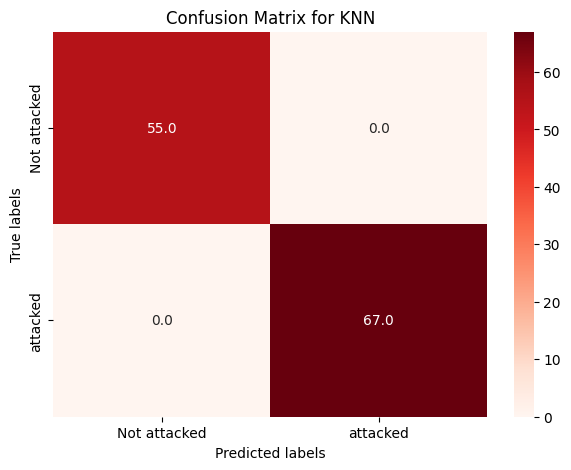

In [98]:
knn_labels = ['Not attacked', 'attacked']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_knn,cmap="Reds",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(knn_labels)
ax.set_yticklabels(knn_labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for KNN');

plt.show()

### Logistic Regression

In [99]:
cc = 10.0

lr1 = LogisticRegression(C=cc, random_state=0)
lr1.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=0)

#### Model Evaluation for Logistic Regression


In [100]:
y_pred_lr1 = lr1.predict(X_test)
print(f'\n y_pred_lr1: \n {y_pred_lr1} \n')
print(f'\n y_test: \n {y_test}')


 y_pred_lr1: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 


 y_test: 
 [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0.]


#### Confusion Matrix for Logistic Regression

In [101]:
cm_lr1 = confusion_matrix(y_test, y_pred_lr1)
print(cm_lr1)

[[55  0]
 [67  0]]


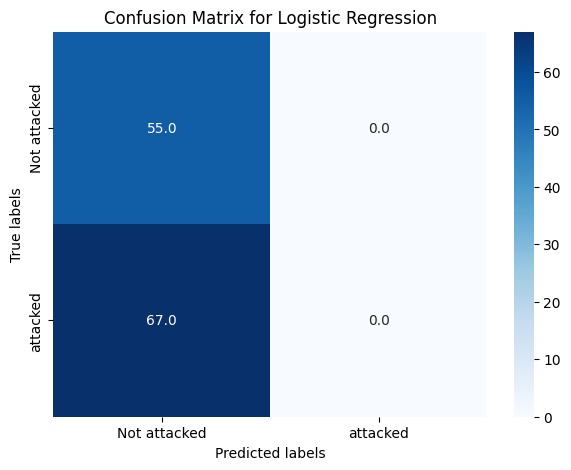

In [102]:
lr_labels = ['Not attacked', 'attacked']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_lr1,cmap="Blues",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(lr_labels)
ax.set_yticklabels(lr_labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for Logistic Regression');

plt.show()

#### Accuracy of Logistic Regression

Accuracy: 0.55
Accuracy: 0.57
Accuracy: 0.97
Accuracy: 0.99
Accuracy: 0.99
Accuracy: 1.00
Accuracy: 1.00
Accuracy: 1.00


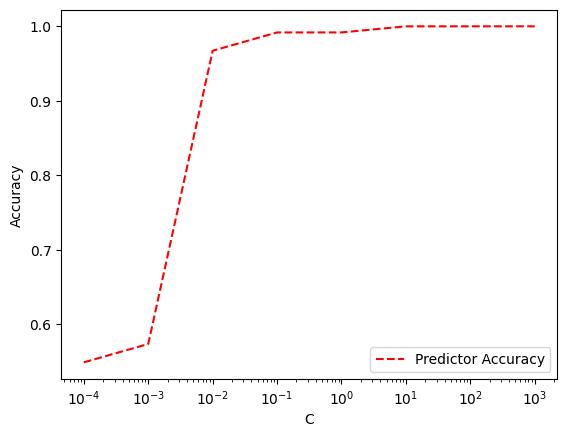

In [103]:
accuracy_lr1 = []
weights, params = [], []
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

for c in np.arange(-4., 4.):
    lr1 = LogisticRegression(C=10.**c, random_state=0)
    lr1.fit(X_train_std, y_train)
    weights.append(lr1.coef_[0])
    params.append(10**c)
    y_pred = lr1.predict(X_test_std)
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    accuracy_lr1.append(accuracy_score(y_test, y_pred))

plt.plot(params, accuracy_lr1,color='r', linestyle='--',label='Predictor Accuracy')


plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend(loc='best')
plt.xscale('log')

plt.show()

### Support Vector Machine (SVM)



In [104]:
svm1 = SVC(kernel='rbf', random_state=0, gamma=0.1, C=cc)
svm1.fit(X_train, y_train)

SVC(C=10.0, gamma=0.1, random_state=0)

#### Model Evaluation for Support Vector Machine

In [105]:
y_pred_svm1 = svm1.predict(X_test)
print(f'\n y_pred_svm1: \n {y_pred_svm1} \n')
print(f'\n y_test: \n {y_test}')


 y_pred_svm1: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.] 


 y_test: 
 [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0.]


In [106]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### Confusion Matrix for Support Vector Machine

In [107]:
cm_svm1 = confusion_matrix(y_test, y_pred_svm1)
print(cm_svm1)

[[ 0 55]
 [ 0 67]]


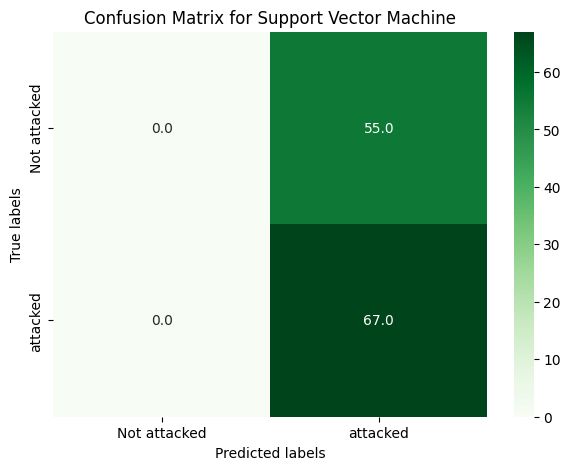

In [108]:
svm_labels = ['Not attacked', 'attacked']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_svm1,cmap="Greens",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(svm_labels)
ax.set_yticklabels(svm_labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for Support Vector Machine');

plt.show()

#### Accuracy of Support Vector Machine

y_pred  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Accuracy: 0.55
y_pred  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Accuracy: 0.55
y_pred  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

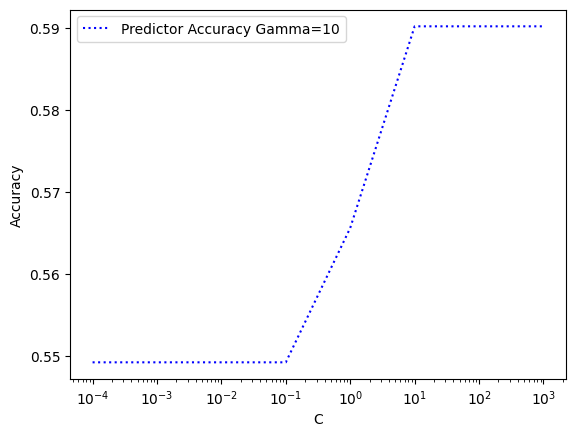

In [109]:
accuracy_svm = []
weights, params = [], []
for c in np.arange(-4., 4.):

    svm = SVC(kernel='rbf', random_state=0, gamma=10, C=10.**c)
    svm.fit(X_train_std, y_train)
    params.append(10**c)
    y_pred = svm.predict(X_test_std)
    print("y_pred ", y_pred)
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    accuracy_svm.append(accuracy_score(y_test, y_pred))

plt.plot(params, accuracy_svm,color='b', linestyle=':',label='Predictor Accuracy Gamma=10')

plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend(loc='best')
plt.xscale('log')

plt.show()

## Adding Malicious Data into Training Datasets

###**Check Train Datasets**

In [110]:
print("\n X_train Shape: ", X_train.shape)
print("\n y_train  Shape: ", y_train.shape)
print("\n Top 5 rows of X_train: ", X_train.head(5))
print("\n Top 5 labels of y_train: ", y_train[:5])


 X_train Shape:  (486, 6)

 y_train  Shape:  (486,)

 Top 5 rows of X_train:         timestamp  rssi  remote_rssi  txbuf  noise  remote_noise
324  409868758.0    27           26      8     12             1
561  348867806.0    15           15      9     20            13
118  732808778.0    21           20     11     12             8
295  380886843.0    26           21     11     12            11
588  375895179.0    17           19     11     14             8

 Top 5 labels of y_train:  [1. 1. 0. 1. 1.]


### Create 100 malicious training datapoints

**Copy 1st 100 rows from `X_train`**

In [111]:
mal_X = X_train.head(400).copy()
print("Top 5 Rows of \n Malicious X_train: ", mal_X.head(5))

Top 5 Rows of 
 Malicious X_train:         timestamp  rssi  remote_rssi  txbuf  noise  remote_noise
324  409868758.0    27           26      8     12             1
561  348867806.0    15           15      9     20            13
118  732808778.0    21           20     11     12             8
295  380886843.0    26           21     11     12            11
588  375895179.0    17           19     11     14             8


**Copy 1st first 100 labels from `y_train`**

In [112]:
mal_y = y_train[:400]
print("\n y_mal: ", mal_y)


 y_mal:  [1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1

**Change all 1 to 0 and 0 to 1 in `mal_y`**

In [113]:
mal_y = np.where(mal_y == 0, 1.0, 0.0)
print("\n y_mal: ", mal_y)


 y_mal:  [0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0

**Add `mal_X` to `X_train` and `mal_y` to `y_train`**

In [114]:
X_train = pd.concat([X_train, mal_X], ignore_index=True)
y_train = np.concatenate((y_train, mal_y))
print("\n X_train Shape: ", X_train.shape)
print("\n y_train  Shape: ", y_train.shape)
print("\n Top 5 rows of X_train: ", X_train.head(5))
print("\n Top 5 labels of y_train: ", y_train[:5])


 X_train Shape:  (886, 6)

 y_train  Shape:  (886,)

 Top 5 rows of X_train:       timestamp  rssi  remote_rssi  txbuf  noise  remote_noise
0  409868758.0    27           26      8     12             1
1  348867806.0    15           15      9     20            13
2  732808778.0    21           20     11     12             8
3  380886843.0    26           21     11     12            11
4  375895179.0    17           19     11     14             8

 Top 5 labels of y_train:  [1. 1. 0. 1. 1.]


## Training ML Model with Contaminated Train Datasets

### Poisoned KNN

In [115]:
knn_poisoned = KNeighborsClassifier()
knn_poisoned = KNeighborsClassifier(n_neighbors=79, weights='uniform')
knn_poisoned.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=79)

#### Poisoned KNN Model Evaluation

In [116]:
y_pred_knn_poisoned = knn_poisoned.predict(X_test)

print(f'\n y_pred_knn_poisoned: \n {y_pred_knn_poisoned}')
print(f'\n y_test: \n {y_test}')


 y_pred_knn_poisoned: 
 [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0.]

 y_test: 
 [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0.]


#### Confusion Matrix for Poisoned KNN

In [117]:
cm_knn_poisoned = confusion_matrix(y_test, y_pred_knn_poisoned)
print(cm_knn_poisoned)

[[54  1]
 [ 0 67]]


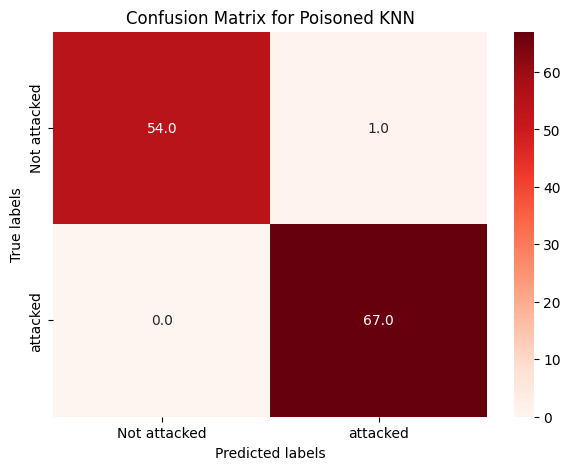

In [118]:
poisoned_knn_labels = ['Not attacked', 'attacked']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_knn_poisoned,cmap="Reds",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(poisoned_knn_labels)
ax.set_yticklabels(poisoned_knn_labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for Poisoned KNN');

plt.show()

### Poisoned Logistic Regression

In [119]:
cc = 10.0

lr1_poisoned = LogisticRegression(C=cc, random_state=0)
lr1_poisoned.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=0)

#### Poisoned LR Model Evaluation

In [120]:
y_pred_lr1_poisoned = lr1_poisoned.predict(X_test)
print(f'\n y_pred_lr1_poisoned: \n {y_pred_lr1_poisoned} \n')
print(f'\n y_test: \n {y_test}')


 y_pred_lr1_poisoned: 
 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1.] 


 y_test: 
 [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0.]


#### Confusion Matrix for Poisoned LR

In [121]:
cm_lr1_poisoned = confusion_matrix(y_test, y_pred_lr1_poisoned)
print(cm_lr1_poisoned)

[[38 17]
 [ 7 60]]


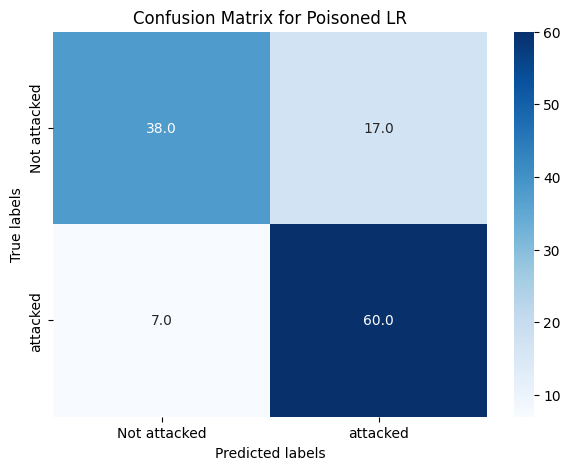

In [122]:
poisoned_lr1_labels = ['Not attacked', 'attacked']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_lr1_poisoned,cmap="Blues",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(poisoned_lr1_labels)
ax.set_yticklabels(poisoned_lr1_labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for Poisoned LR');

plt.show()

#### Accuracy for Poisoned LR

Accuracy: 0.55
Accuracy: 0.55
Accuracy: 0.85
Accuracy: 0.91
Accuracy: 0.92
Accuracy: 0.92
Accuracy: 0.92
Accuracy: 0.92


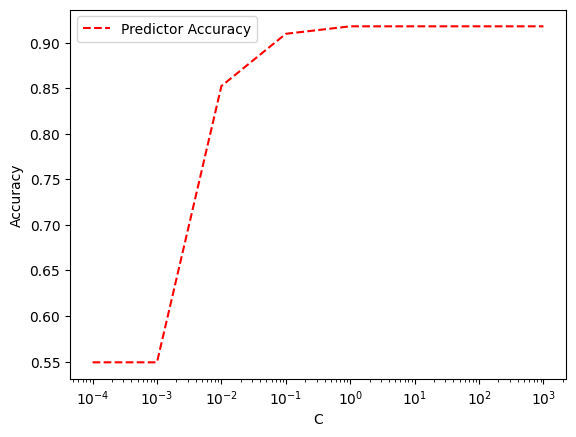

In [123]:
accuracy_lr1_poisoned = []
weights, params = [], []
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

for c in np.arange(-4., 4.):
    lr1_poisoned = LogisticRegression(C=10.**c, random_state=0)
    lr1_poisoned.fit(X_train_std, y_train)
    weights.append(lr1_poisoned.coef_[0])
    params.append(10**c)
    y_pred = lr1_poisoned.predict(X_test_std)
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    accuracy_lr1_poisoned.append(accuracy_score(y_test, y_pred))

plt.plot(params, accuracy_lr1_poisoned,color='r', linestyle='--',label='Predictor Accuracy')


plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend(loc='best')
plt.xscale('log')

plt.show()

### Poisoned Support Vector Machine (SVM)

In [124]:
svm1_poisoned = SVC(kernel='rbf', random_state=0, gamma=0.1, C=cc)
svm1_poisoned.fit(X_train, y_train)

SVC(C=10.0, gamma=0.1, random_state=0)

#### Poisoned SVM Model Evaluation

In [125]:
y_pred_svm1_poisoned = svm1_poisoned.predict(X_test)
print(f'\n y_pred_svm1_poisoned: \n {y_pred_svm1_poisoned} \n')
print(f'\n y_test: \n {y_test}')


 y_pred_svm1_poisoned: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.] 


 y_test: 
 [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0.]


In [126]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### Confusion Matrix for Poisoned SVM

In [127]:
cm_svm1_poisoned = confusion_matrix(y_test, y_pred_svm1_poisoned)
print(cm_svm1_poisoned)

[[ 0 55]
 [ 0 67]]


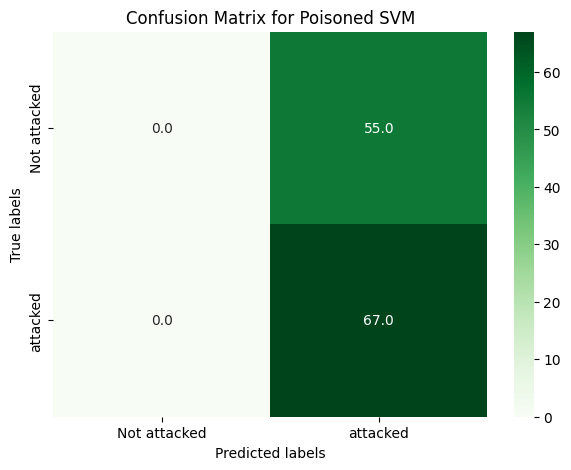

In [128]:
poisoned_svm1_labels = ['Not attacked', 'attacked']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_svm1_poisoned,cmap="Greens",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(poisoned_svm1_labels)
ax.set_yticklabels(poisoned_svm1_labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for Poisoned SVM');

plt.show()

#### Accuracy for Poisoned SVM

y_pred  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Accuracy: 0.55
y_pred  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Accuracy: 0.55
y_pred  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

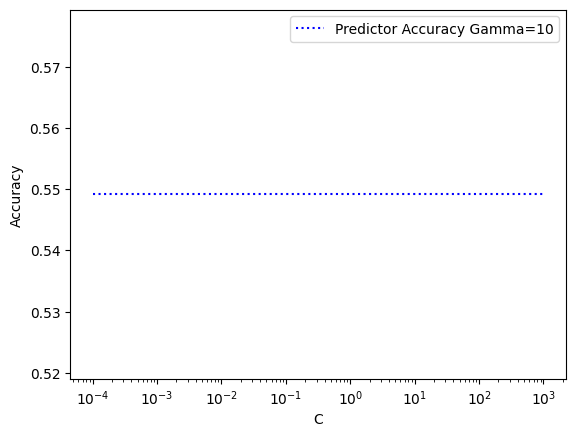

In [129]:
accuracy_svm1_poisoned = []
weights, params = [], []
for c in np.arange(-4., 4.):

    svm1_poisoned = SVC(kernel='rbf', random_state=0, gamma=10, C=10.**c)
    svm1_poisoned.fit(X_train_std, y_train)
    params.append(10**c)
    y_pred = svm1_poisoned.predict(X_test_std)
    print("y_pred ", y_pred)
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    accuracy_svm1_poisoned.append(accuracy_score(y_test, y_pred))

plt.plot(params, accuracy_svm1_poisoned,color='b', linestyle=':',label='Predictor Accuracy Gamma=10')

plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend(loc='best')
plt.xscale('log')

plt.show()